In [29]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [30]:
fashion_data = keras.datasets.fashion_mnist # Criando a conexãom com api do keras e deifinindo o dataset escolhido

In [31]:
(train_imagem,train_labels),(test_imagens,test_labels) = fashion_data.load_data() #carregando os dados da base fashion_mnist e dividino entre treino e test

In [32]:
train_imagem = train_imagem/255.0
test_imagens = test_imagens/255.0

In [33]:
model = keras.Sequential([
    keras.Input(shape=(28,28)),#Definir o tipo de entrada, como é uma imagem de 28 x 28, definimos a entrada do mesmo tipo
    keras.layers.Flatten(),#Flatten vai transformar a imagem em uma matrix linear simples
    keras.layers.Dense(1024,activation=tf.nn.relu),#As vezes mais neuronios é melhor, mas as vezes não e pode não ser uma boa opção porque pode levar muito tempo
    keras.layers.Dense(10,activation=tf.nn.softmax) #Como são 10 as categorias a serem classificadas então o dense final será de 10
])

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_imagem,train_labels,verbose=1,epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7903 - loss: 0.5853
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8673 - loss: 0.3609
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8807 - loss: 0.3211
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8881 - loss: 0.2940
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8979 - loss: 0.2746
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9034 - loss: 0.2627
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9094 - loss: 0.2418
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9106 - loss: 0.2367
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9151 - loss: 0.2269
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9205 - loss: 0.2153
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9216 - loss: 0.2086
Epoch 12

In [35]:
model.evaluate(test_imagens, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8869 - loss: 0.3591


[0.3567071557044983, 0.8848000168800354]

In [36]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch, logs={}):
        if (logs.get('accuracy')>0.91):
            print('Interrup training')
            self.model.stop_training=True
    
callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_imagem, train_labels, epochs=35, callbacks=[callbacks])

Epoch 1/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7927 - loss: 0.5918
Epoch 2/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8654 - loss: 0.3659
Epoch 3/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8808 - loss: 0.3183
Epoch 4/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8900 - loss: 0.2983
Epoch 5/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8984 - loss: 0.2758
Epoch 6/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9020 - loss: 0.2612
Epoch 7/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9075 - loss: 0.2467
Epoch 8/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9108 - loss: 0.2400
Epoch 9/35
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9136 - loss: 0.2304Interrup training
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9136 - loss: 0.2304


In [37]:
model.evaluate(test_imagens, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8838 - loss: 0.3323


[0.3311022222042084, 0.8855000138282776]

In [38]:
import matplotlib.pyplot as plt

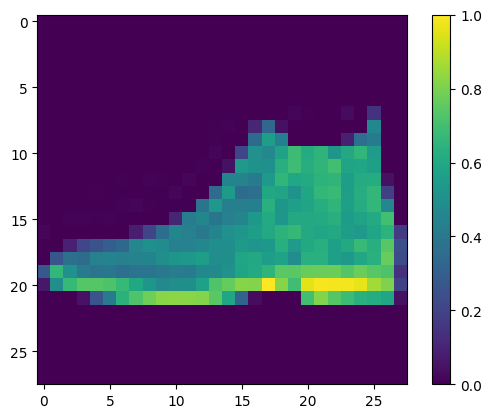

In [39]:
plt.imshow(test_imagens[0])
plt.colorbar()
plt.show()

In [40]:
print(f'LABEL: {test_labels[0]}')
print(f'\nIMAGEM PIXEL ARRAY:\n\n{test_imagens[0]}\n\n')

LABEL: 9

IMAGEM PIXEL ARRAY:

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.